In [28]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [29]:
df=pd.read_csv(r'D:\data\bigdatamart.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [30]:
df.shape

(8523, 12)

In [31]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [33]:
df.isnull().head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

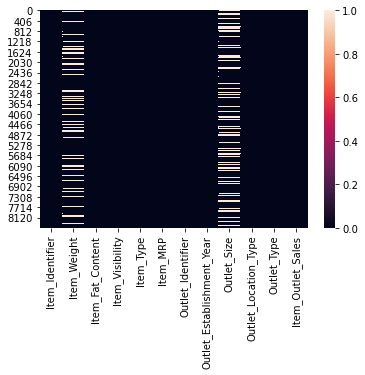

In [35]:
sns.heatmap(df.isnull())

The data has null values.hence replaced as too many null values are present in the data.

In [36]:
from sklearn.impute import SimpleImputer

In [37]:
imp=SimpleImputer(missing_values=np.nan, strategy='mean')
df['Item_Weight']=imp.fit_transform(df['Item_Weight'].values.reshape(-1,1))
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [38]:
imp=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Outlet_Size']=imp.fit_transform(df['Outlet_Size'].values.reshape(-1,1))
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


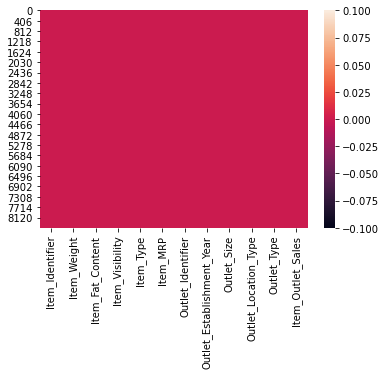

In [39]:
sns.heatmap(df.isnull())

The data has no null values.

In [40]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [42]:
from sklearn import preprocessing 

In [43]:
le=preprocessing.LabelEncoder()

In [44]:
list=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type',
       'Outlet_Type','Outlet_Establishment_Year']

In [45]:
for val in list:
    df[val] = le.fit_transform(df[val].astype(str))

In [46]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,4,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,8,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,4,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,3,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1,0,2,1,994.7052


In [47]:
df.shape

(8523, 12)

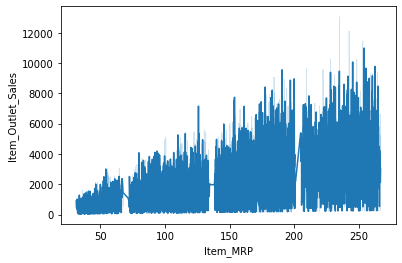

In [48]:
sns.lineplot(df['Item_MRP'],df['Item_Outlet_Sales'])

The Iten_MRP shows linear relationship with Outlet_Sales so Linear Regression is used for the data.

In [49]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.066132,7.226681,140.992782,4.722281,3.790684,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.644810,0.051598,4.209990,62.275067,2.837201,2.730322,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,0.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,1.000000,0.053931,6.000000,143.012800,5.000000,4.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,6.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,8.000000,2.000000,2.000000,3.000000,13086.964800


In [50]:
df.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year    0.034270
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

In [52]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.014288,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007975,-0.007489,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.098114,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.002357,0.001595,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.082927,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.006527,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.004162,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.002357,-0.100439,0.001656,0.003319,1.000000,-0.030969,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.014288,-0.007489,0.001595,-0.082927,0.006527,0.004162,-0.030969,1.000000,0.070786,0.042005,-0.040040,-0.025525
Outlet_Size,0.001389,-0.007225,-0.012058,0.069309,-0.001859,0.006059,0.504603,0.070786,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.716176,0.042005,-0.614311,1.000000,0.467219,0.089367


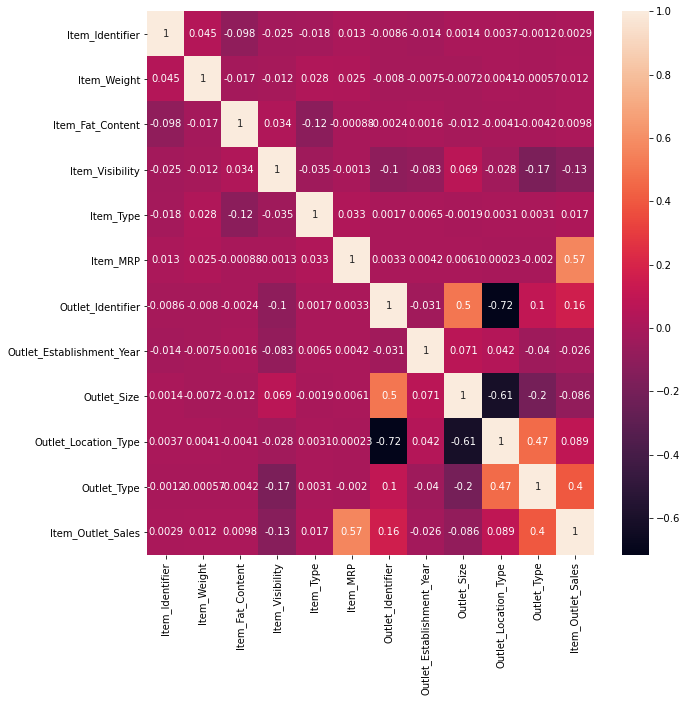

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [54]:
correlations = df.corr()['Item_Outlet_Sales'].sort_values(ascending=False)
print(correlations)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Type                  0.401522
Outlet_Identifier            0.162325
Outlet_Location_Type         0.089367
Item_Type                    0.017048
Item_Weight                  0.011550
Item_Fat_Content             0.009800
Item_Identifier              0.002869
Outlet_Establishment_Year   -0.025525
Outlet_Size                 -0.086182
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


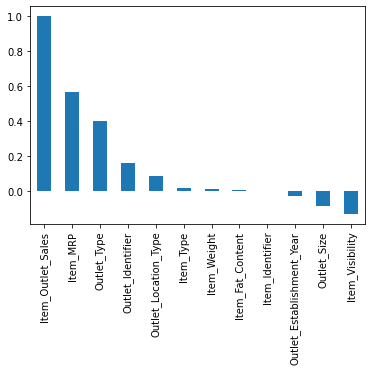

In [105]:
correlations.plot(kind='bar')

All the data is showing good correlation with Outlet Sales

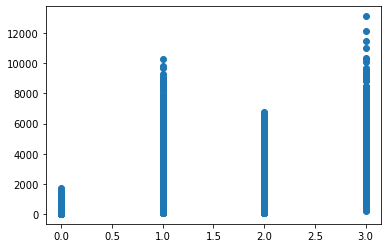

In [56]:
plt.scatter(df['Outlet_Type'],df['Item_Outlet_Sales'])

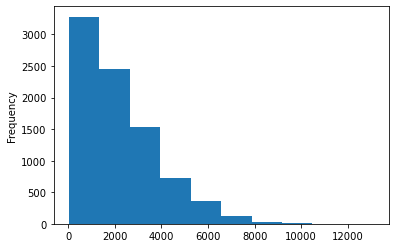

In [57]:
df['Item_Outlet_Sales'].plot.hist()

Item_Identifier                 AxesSubplot(0.125,0.536818;0.110714x0.343182)
Item_Weight                  AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Item_Fat_Content             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Item_Visibility              AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Item_Type                    AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Item_MRP                     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Outlet_Identifier                  AxesSubplot(0.125,0.125;0.110714x0.343182)
Outlet_Establishment_Year       AxesSubplot(0.257857,0.125;0.110714x0.343182)
Outlet_Size                     AxesSubplot(0.390714,0.125;0.110714x0.343182)
Outlet_Location_Type            AxesSubplot(0.523571,0.125;0.110714x0.343182)
Outlet_Type                     AxesSubplot(0.656429,0.125;0.110714x0.343182)
Item_Outlet_Sales               AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

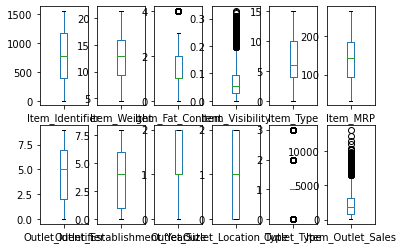

In [58]:
df.plot(kind='box',subplots=True,layout=(2,6))

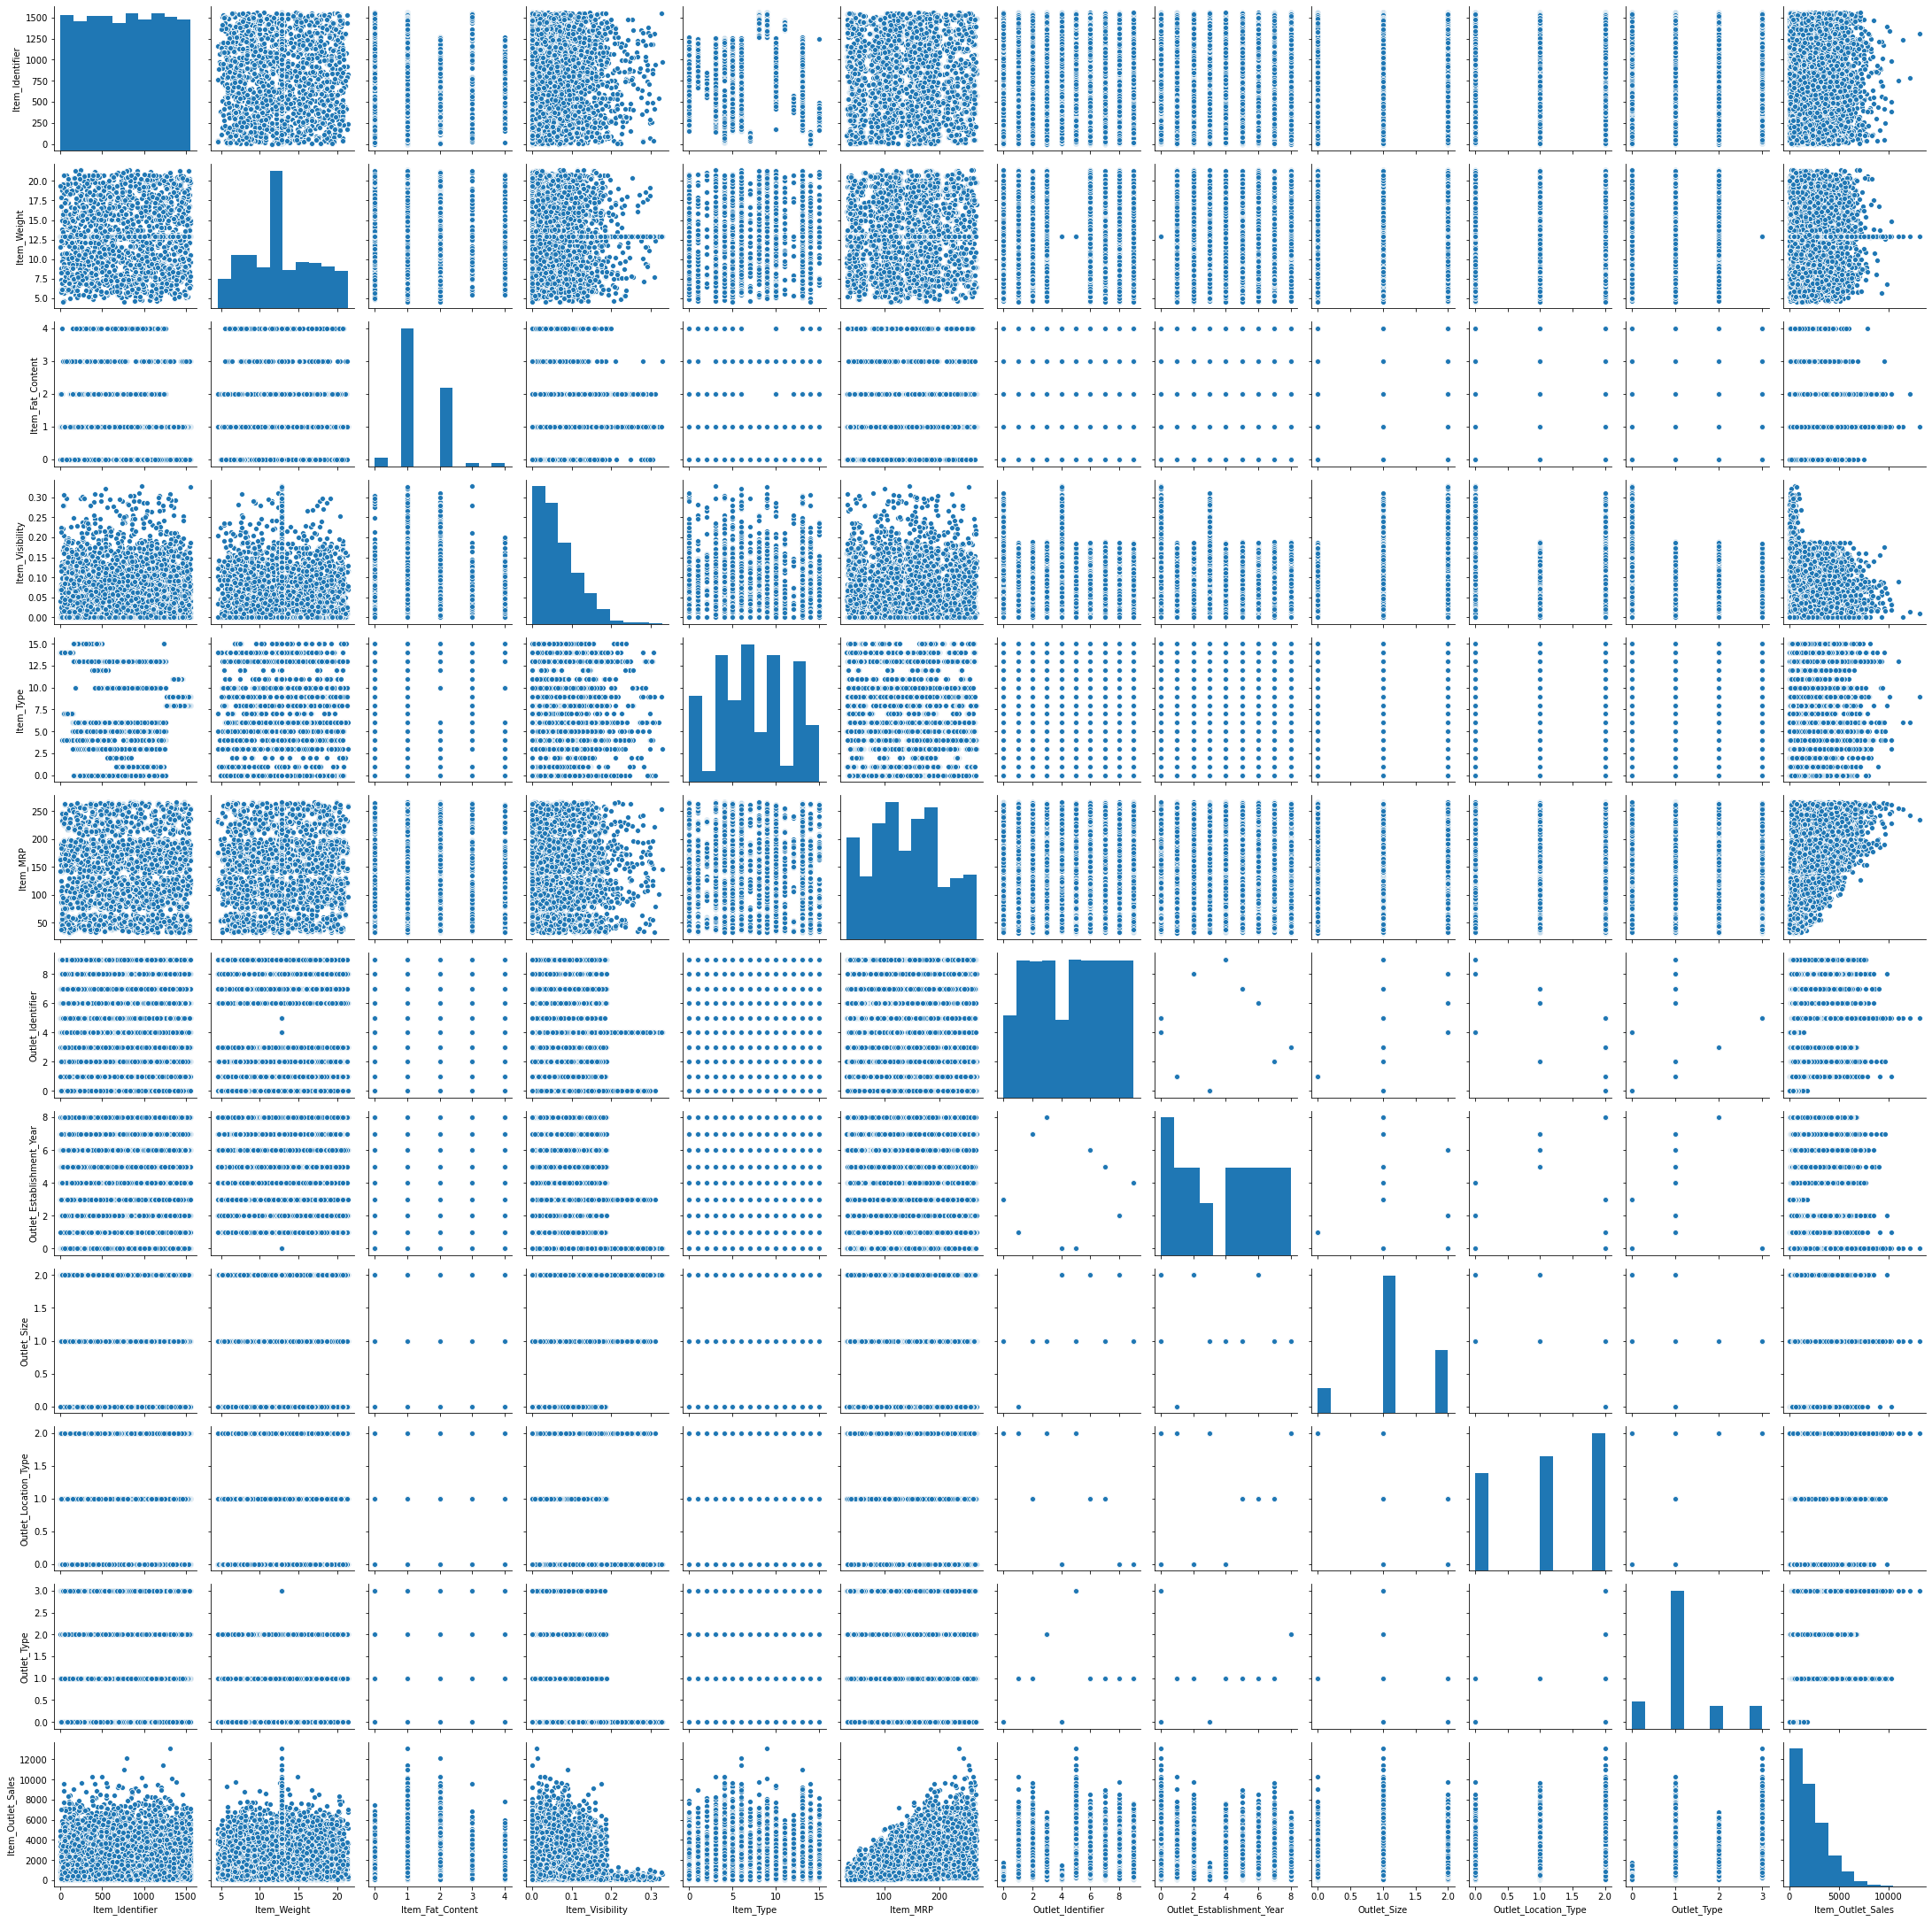

In [59]:
sns.pairplot(df)

In [109]:
from scipy.stats import zscore

In [110]:
z=np.abs(zscore(df))
z

array([[1.38851383, 0.84187169, 0.57284357, ..., 1.36933384, 0.25265831,
        0.910601  ],
       [1.71799137, 1.64170589, 0.97809218, ..., 1.09156913, 1.00297245,
        1.01844035],
       [0.26205684, 1.09855449, 0.57284357, ..., 1.36933384, 0.25265831,
        0.04923754],
       ...,
       [1.28515188, 0.53424315, 0.57284357, ..., 0.13888236, 0.25265831,
        0.57909963],
       [0.21975905, 1.33644372, 0.97809218, ..., 1.09156913, 1.00297245,
        0.19672492],
       [1.62449099, 0.45963367, 0.57284357, ..., 1.36933384, 0.25265831,
        0.82959407]])

In [111]:
thresold=3
print(np.where(z>3))

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
        333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
        615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
        991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
       1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
       1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
       1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
       2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
       2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
       2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
       3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
       3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
       3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
       3884, 3993, 4006, 4019, 4083, 4163, 4219, 4

In [112]:
df=df[(z<3).all(axis=1)]

The box plot shows outliers are present in the data.The pairplot shows some skewness is present in the data

The outliers are removed from the data

In [113]:
x=df.iloc[:,0:-1]
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,1,0.016047,4,249.8092,9,4,1,0,1
1,8,5.92,2,0.019278,14,48.2692,3,8,1,2,2
2,662,17.50,1,0.016760,10,141.6180,9,4,1,0,1
3,1121,19.20,2,0.000000,6,182.0950,0,3,1,2,0
4,1297,8.93,1,0.000000,9,53.8614,1,1,0,2,1


In [114]:
y=df.iloc[:,-1]
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

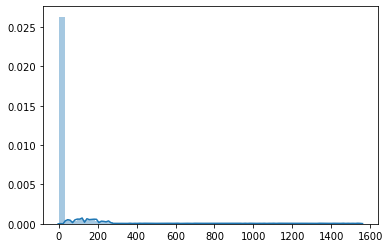

In [115]:
sns.distplot(x)

In [116]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

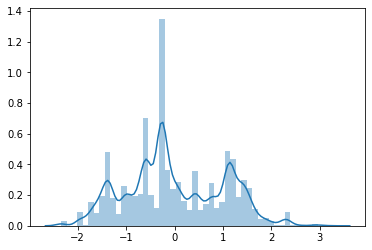

In [117]:
sns.distplot(x)                                                   # Data is normalised

In [118]:
x=pd.DataFrame(data=x)
x

,0,1,2,3,4,5,6,7,8,9,10
0,-1.385259,-0.837583,-0.583894,-1.010194,-0.769127,1.771577,1.496796,0.059726,-0.279989,-1.370796,-0.260586
1,-1.712986,-1.632565,1.175922,-0.942041,1.611449,-1.484581,-0.616358,1.529985,-0.279989,1.099221,1.019304
2,-0.264789,1.091072,-0.583894,-0.995159,0.659219,0.023598,1.496796,0.059726,-0.279989,-1.370796,-0.260586
3,0.751607,1.490915,1.175922,-1.348697,-0.293012,0.677560,-1.672935,-0.307839,-0.279989,1.099221,-1.540476
4,1.141335,-0.924608,-0.583894,-1.348697,0.421161,-1.394231,-1.320743,-1.042968,-1.940930,1.099221,-0.260586
...,...,...,...,...,...,...,...,...,...,...,...
8217,-0.911384,-1.410300,-0.583894,-0.150905,1.373392,1.201460,-1.320743,-1.042968,-1.940930,1.099221,-0.260586
8218,0.255588,-1.053969,1.175922,-0.357647,-1.721358,-0.517011,0.792411,0.427291,-0.279989,-0.135788,-0.260586
8219,1.274197,-0.531821,-0.583894,-0.606475,0.183103,-0.889167,0.440219,0.794855,1.380953,-0.135788,-0.260586
8220,-0.222716,-1.329155,1.175922,1.714595,1.373392,-0.598177,-0.616358,1.529985,-0.279989,1.099221,1.019304


In [119]:
y=pd.DataFrame(data=y)
y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [120]:
x.shape

(8222, 11)

In [121]:
y.shape

(8222, 1)

In [122]:
max_r_score=0;
for r in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r)
    lm=LinearRegression()
    lm.fit(x_train,y_train) 
    pred=lm.predict(x_test)
    r2=r2_score(y_test,pred)
    print('r2 score for random state:',r,"is:",r2)
    if r2> max_r_score:
        max_r_score=r2;
        final_r_state=r;
print('max r2 score for random state:',final_r_state,"is:",max_r_score)

r2 score for random state: 0 is: 0.5029865115258971
r2 score for random state: 1 is: 0.49224957314724005
r2 score for random state: 2 is: 0.49728563381586177
r2 score for random state: 3 is: 0.4808051408009355
r2 score for random state: 4 is: 0.4996166482006028
r2 score for random state: 5 is: 0.48456192881948945
r2 score for random state: 6 is: 0.5161792846103551
r2 score for random state: 7 is: 0.48780858282362927
r2 score for random state: 8 is: 0.49427451709757864
r2 score for random state: 9 is: 0.5022413603197511
r2 score for random state: 10 is: 0.5001716328647126
r2 score for random state: 11 is: 0.5119609136785077
r2 score for random state: 12 is: 0.5003281324217128
r2 score for random state: 13 is: 0.49483908916329955
r2 score for random state: 14 is: 0.49887332151043795
r2 score for random state: 15 is: 0.49462030403629575
r2 score for random state: 16 is: 0.5025563872561496
r2 score for random state: 17 is: 0.4937294739603353
r2 score for random state: 18 is: 0.512730001922

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=6)

In [125]:
x_train.shape

(6413, 11)

In [126]:
x_test.shape

(1809, 11)

In [127]:
y_train.shape

(6413, 1)

In [128]:
y_test.shape

(1809, 1)

In [129]:
lm=LinearRegression()

In [130]:
lm.fit(x_train,y_train) 

LinearRegression()

In [131]:
pred=lm.predict(x_test)

In [132]:
lm.score(x_train,y_train)

0.4906308282039096

In [133]:
lm.coef_

array([[ 7.85494733e-01, -6.42012102e+00,  1.92907275e+01,
        -6.33116374e+01, -7.02453909e+00,  9.10028247e+02,
         1.63436549e+02,  4.49354058e+01, -2.28521300e+02,
        -2.09547344e+02,  6.23943875e+02]])

In [134]:
lm.intercept_

array([2130.80423374])

In [135]:
print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

errors:
Mean absolute error: 843.8434590184212
Mean squared error: 1199020.8572756185
Root mean squared error: 1094.9981083433972


In [136]:
r2_score(y_test,pred)

0.5266567804876017

In [137]:
from sklearn.ensemble import RandomForestRegressor    

In [138]:
rf=RandomForestRegressor(n_estimators=100,random_state=6)

In [139]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=6)

In [140]:
predrf=rf.predict(x_test)

In [141]:
rf.score(x_train,y_train)

0.9329683338063972

In [144]:
print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

errors:
Mean absolute error: 735.19838035047
Mean squared error: 1040166.4512374318
Root mean squared error: 1019.885508886871


In [145]:
r2_score(y_test,predrf)

0.5893684969115309

In [146]:
from sklearn.model_selection import GridSearchCV

In [147]:
from sklearn.svm import SVR

In [148]:
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10]}
svr=SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(x,y)
GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf','poly')},cv=5)
sorted(clf.cv_results_.keys())


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [149]:
print(clf.best_params_)

{'C': 10, 'kernel': 'linear'}


In [150]:
svr=SVR(kernel='linear',C=10)

In [151]:
svr.fit(x_train,y_train)

SVR(C=10, kernel='linear')

In [152]:
predsvr=svr.predict(x_test)

In [153]:
svr.score(x_train,y_train)

0.481359087861694

In [154]:
r2_score(y_test,predsvr)

0.5140578232396298

In [155]:
from sklearn.tree import DecisionTreeRegressor

In [156]:
dtr=DecisionTreeRegressor(criterion='mse')

In [157]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [158]:
preddtr=dtr.predict(x_test)

In [159]:
dtr.score(x_train,y_train)

1.0

In [160]:
r2_score(y_test,preddtr)

0.17976042414829296

The RandomForest Regressor shows the best r2 score in all the models i.e 0.5893

In [107]:
import joblib

In [108]:
joblib.dump(rf,'titanic_dataset.pkl')

['titanic_dataset.pkl']